## Python_Prediction_Stock_Amazon

## Introduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Load data
amazon_data =pd.read_csv("D:\\IBM_Data_Science\\Data_set\\Data_Kagle_Github\\data_stock\\AMZN_data.csv")
# Check 5 top column
amazon_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [4]:
# Check 5 buttom column

In [5]:
amazon_data.tail(5)

,date,open,high,low,close,volume,Name
1254,2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN
1258,2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741,AMZN


In [6]:
# Check check column and rown
amazon_data.shape

(1259, 7)

In [7]:
# Check column name
amazon_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [8]:
# Check duplicate values
amazon_data.duplicated().sum()

0

In [9]:
# Total number null values of dataframe
amazon_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
# Check information of DataFrame
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [11]:
## Descriptive Statics Analysis
amazon_data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07


In [12]:
# Check unique values
amazon_data.nunique()

date      1259
open      1226
high      1228
low       1228
close     1249
volume    1259
Name         1
dtype: int64

In [13]:
## Drop Name columns
amazon_data=amazon_data.drop(columns=['Name'])

In [14]:
amazon_data.head()

,date,open,high,low,close,volume
0,2013-02-08,261.40,265.25,260.555,261.95,3879078
1,2013-02-11,263.20,263.25,256.600,257.21,3403403
2,2013-02-12,259.19,260.16,257.000,258.70,2938660
3,2013-02-13,261.53,269.96,260.300,269.47,5292996
4,2013-02-14,267.37,270.65,265.400,269.24,3462780


## Chart show Close price

### Close price

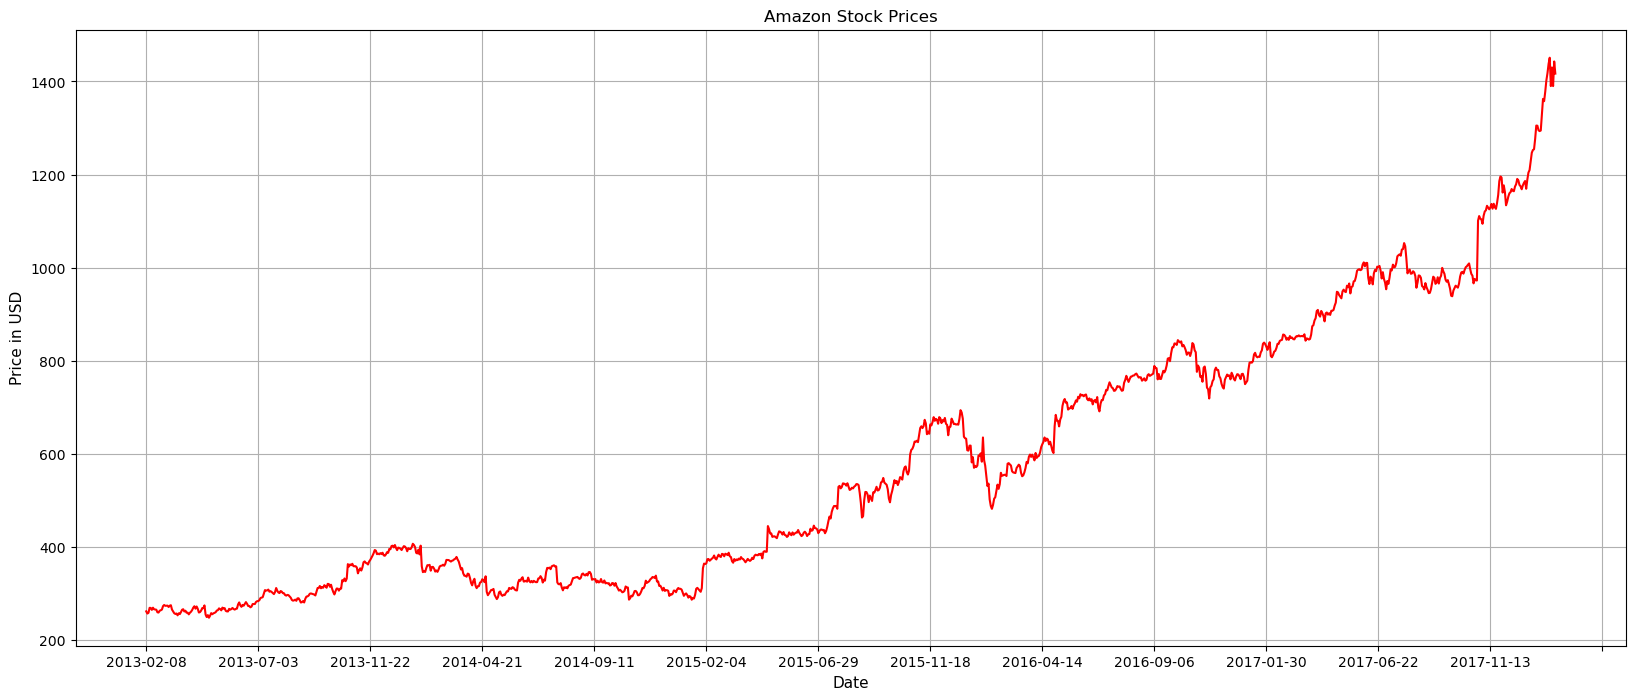

In [15]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(amazon_data['date'],amazon_data['close'],color='red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel("Price in USD",fontsize='11')
plt.title("Amazon Stock Prices")
plt.grid()
plt.show()

## Price in Dolar

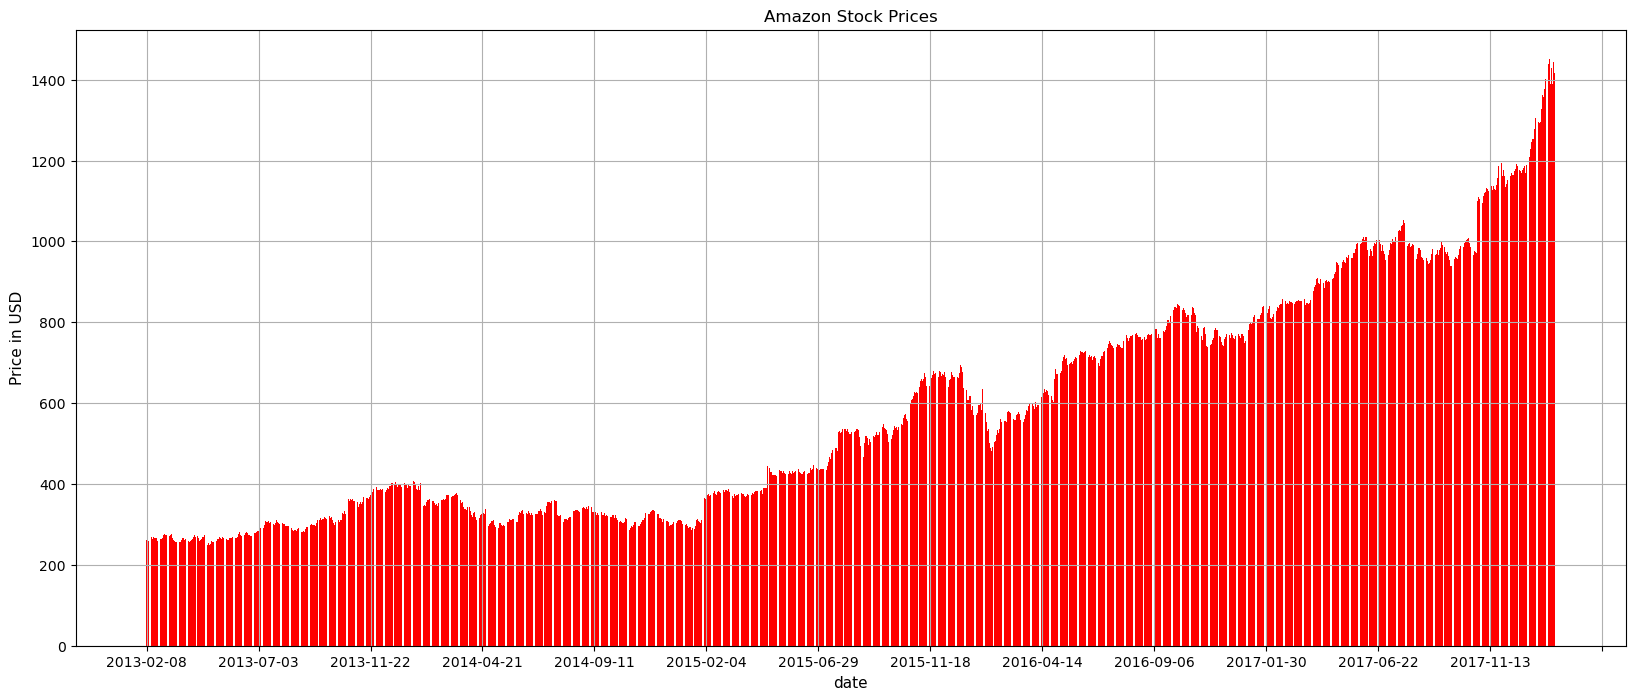

In [16]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['date'], amazon_data['close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices')
plt.grid()
plt.show()

## Volume Trends

TypeError: <lambda>() takes 1 positional argument but 2 were given

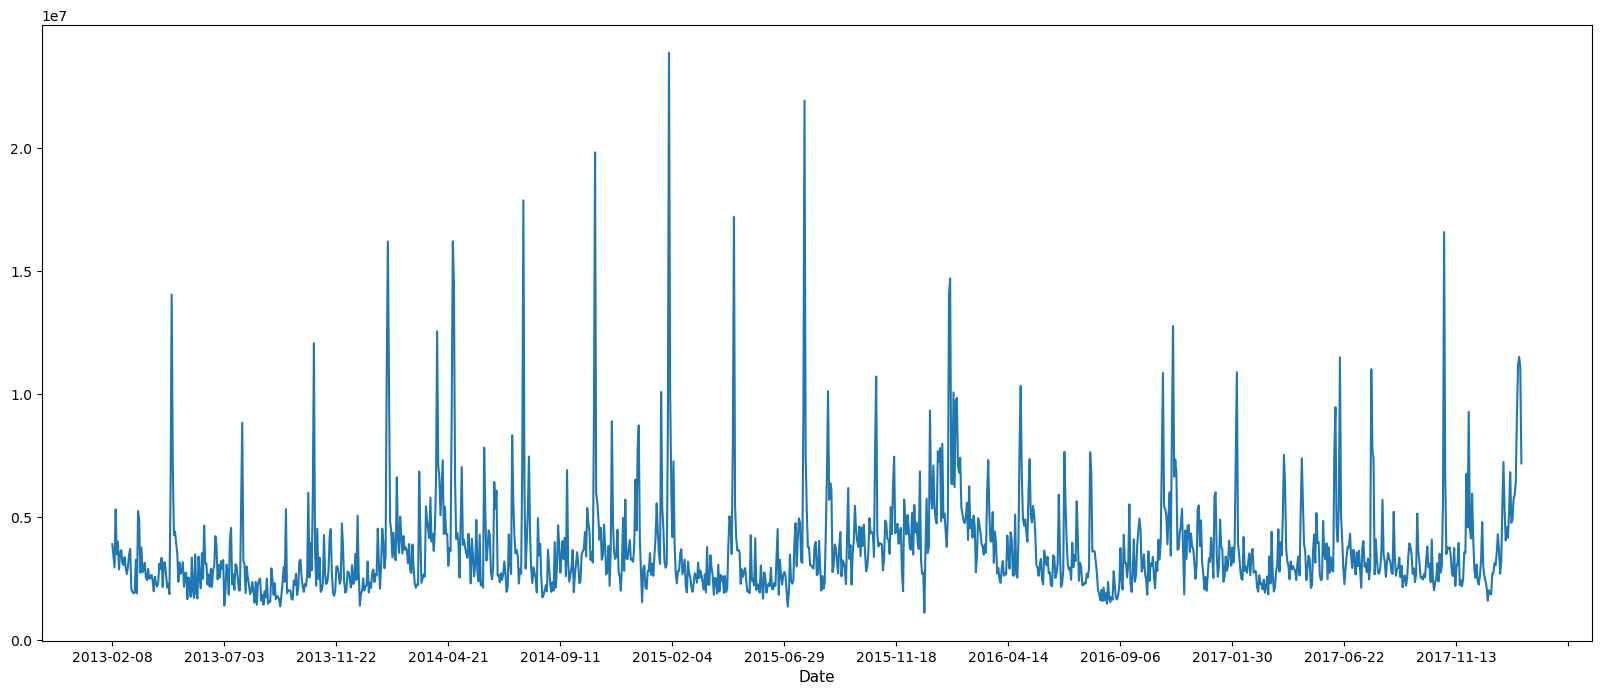

In [17]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(amazon_data['date'],amazon_data['volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel("Date",fontsize='11')
ax.set("Volumes",fontsize='11')
plt.title("Volumes Trend",fontsize="11")
plt.grid()
plt.show()

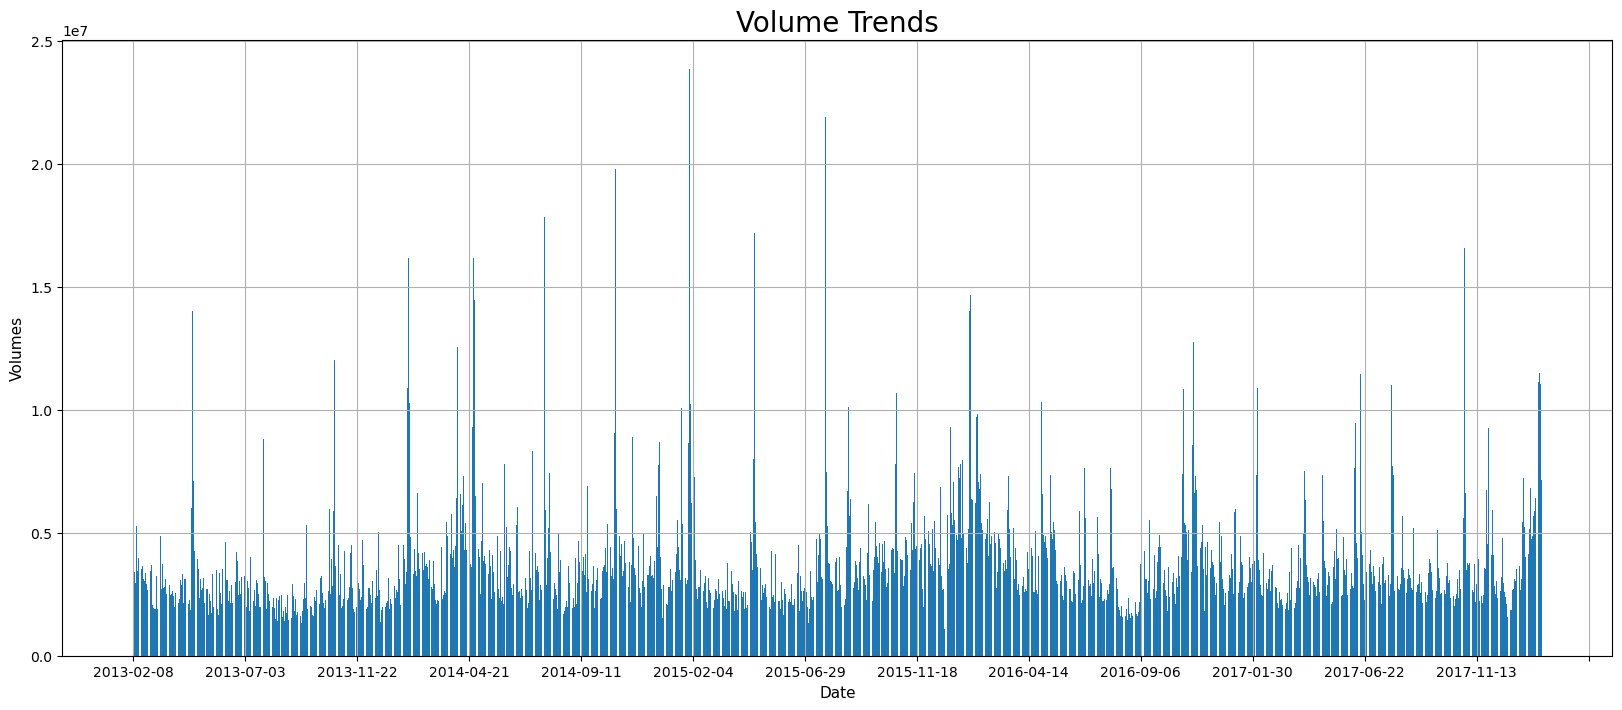

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['date'], amazon_data['volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()

## Market Cap

In [24]:
amazon_data['Market Cap'] = amazon_data['open']*amazon_data['volume']

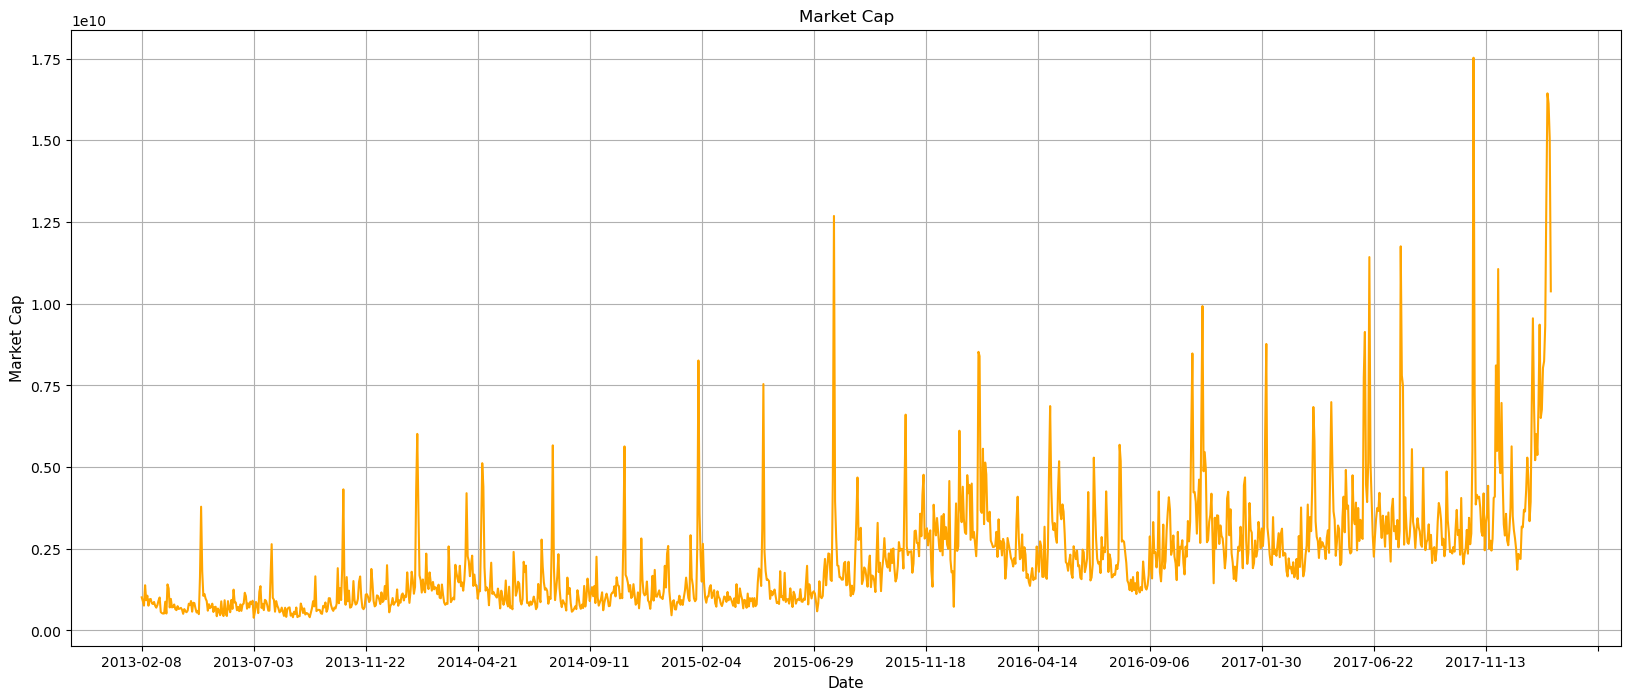

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['date'], amazon_data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

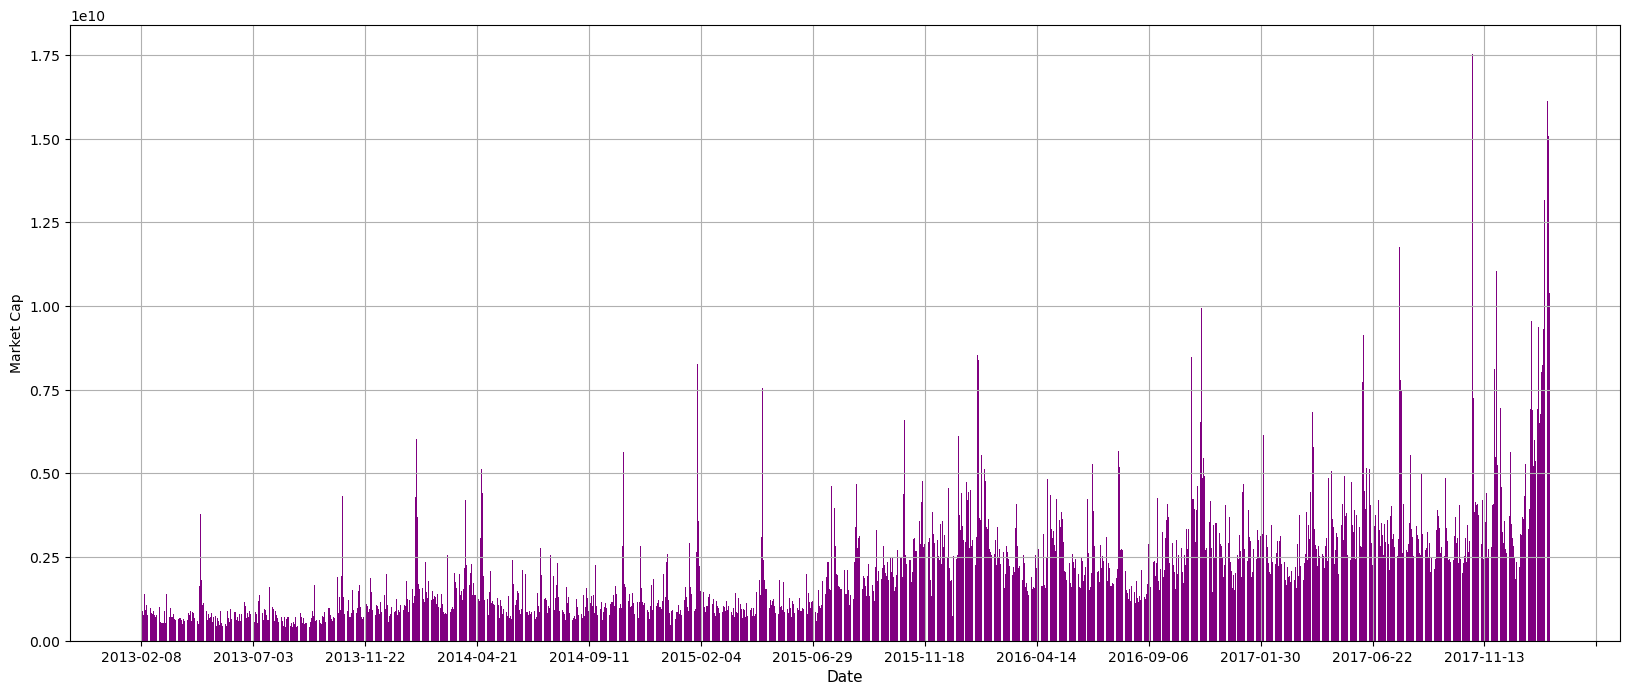

In [31]:
fig,ax=plt.subplots(figsize=(20,8))
ax.bar(amazon_data['date'],amazon_data['Market Cap'],color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel("Date",fontsize='11')
ax.set_ylabel("Market Cap")
plt.grid()
plt.show()

In [29]:
amazon_data.iloc[amazon_data['Market Cap'].argmax()]

date                  2017-10-27
open                     1058.14
high                     1105.58
low                      1050.55
close                    1100.95
volume                  16565021
Market Cap    17528111320.940002
Name: 1189, dtype: object

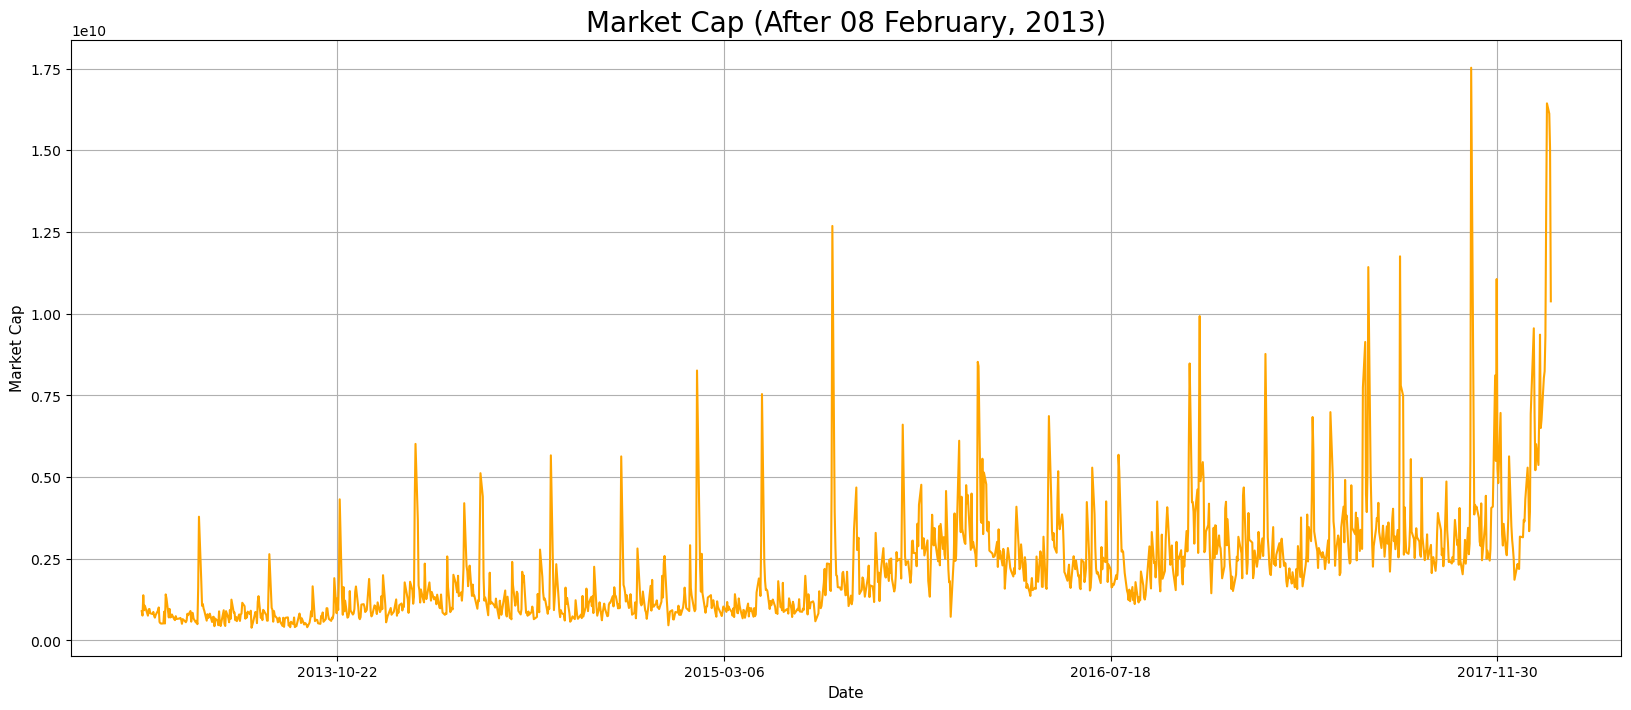

In [35]:
ohlc=amazon_data[(amazon_data['date']>"2013-02-08")]
ohlc = ohlc.loc[:, ['date', 'open', 'high', 'low', 'close', 'volume',
                   'Market Cap']]
ohlc['date'] = pd.to_datetime(ohlc['date'])
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['date'], ohlc['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Market Cap (After 08 February, 2013)', fontsize='20')
plt.show()

## Volatility (dot com)

In [40]:
amazon_data['vol']=(amazon_data['close']/amazon_data['close'].shift(1))-1

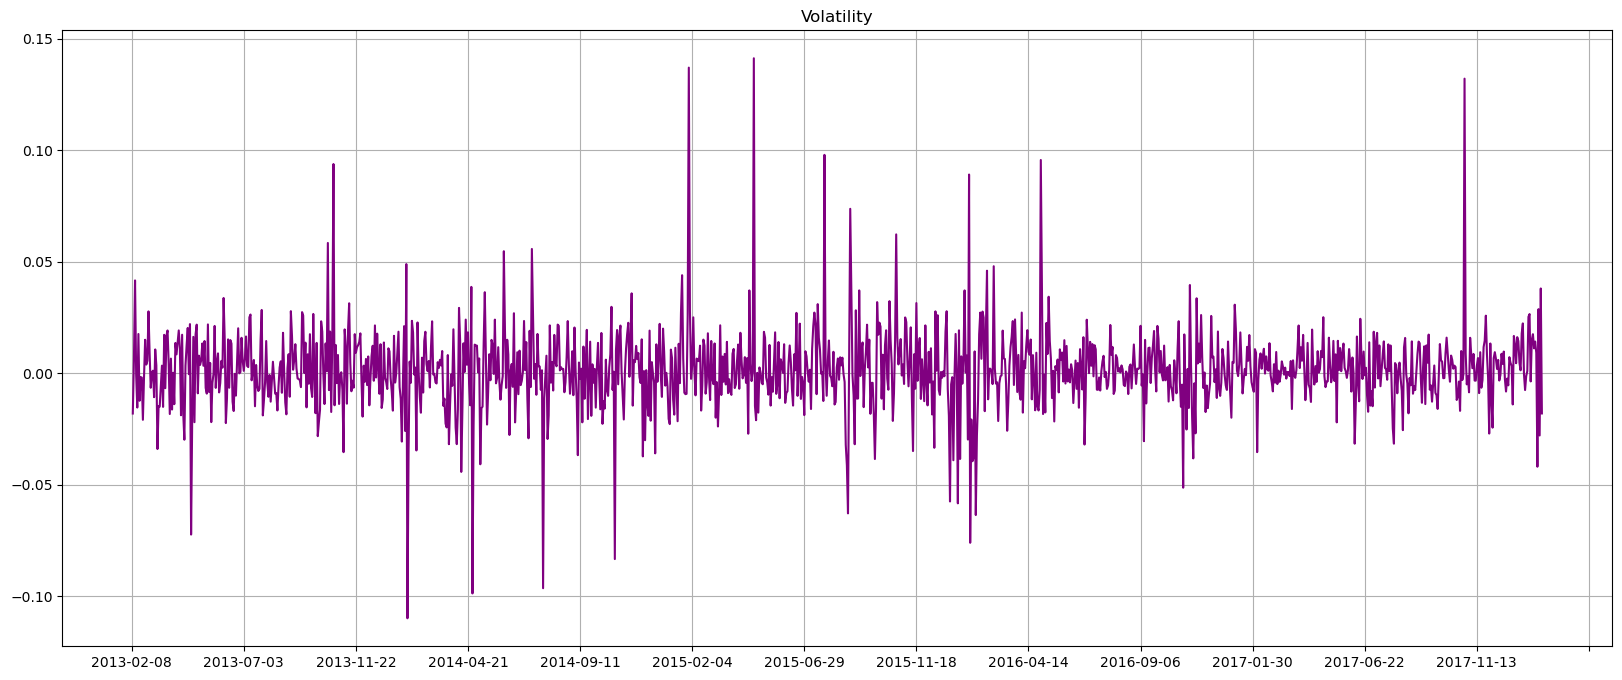

In [43]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(amazon_data['date'],amazon_data['vol'],color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title("Volatility")
plt.grid()
plt.show()

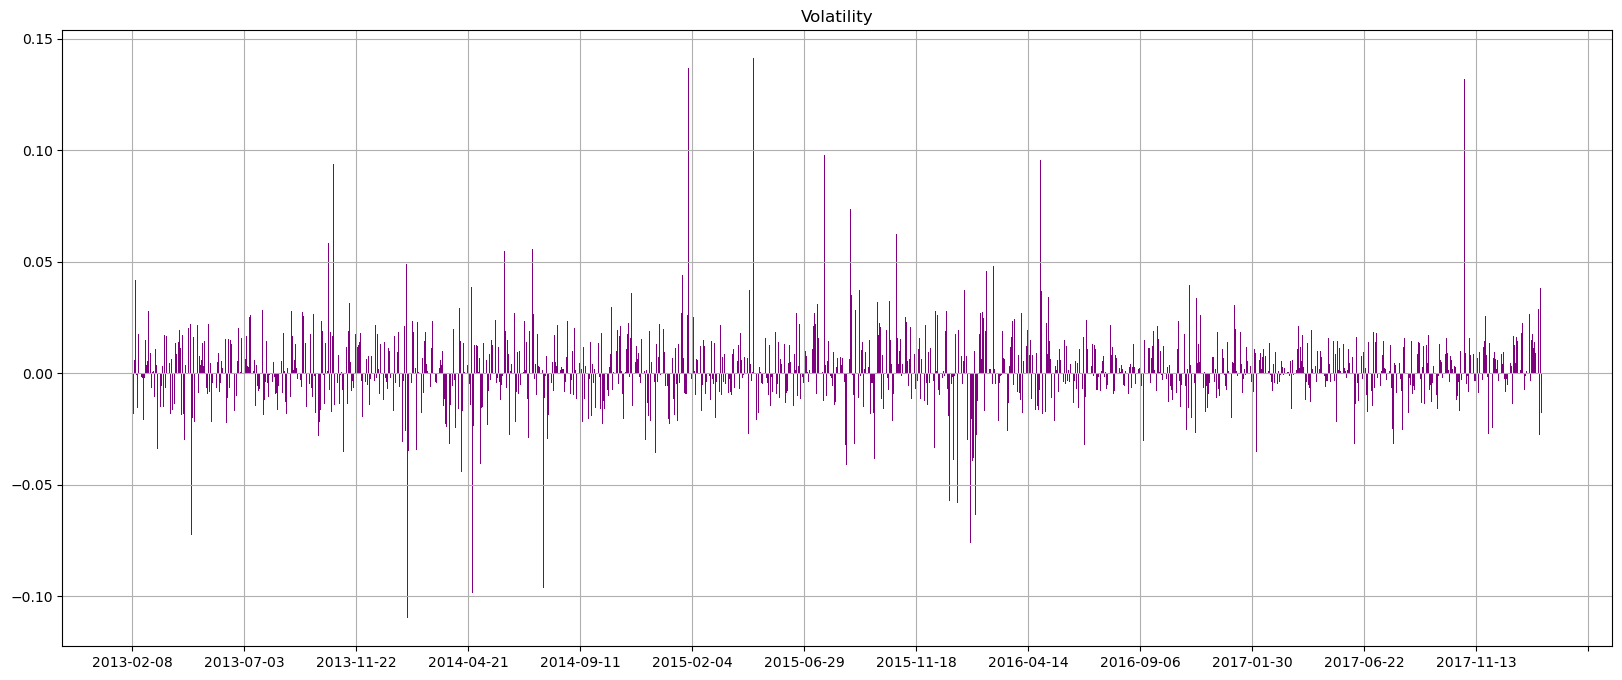

In [47]:
fig,ax=plt.subplots(figsize=(20,8))
ax.bar(amazon_data['date'],amazon_data['vol'],color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title("Volatility")
plt.grid()
plt.show()

In [48]:
## vol distribution

<AxesSubplot: >

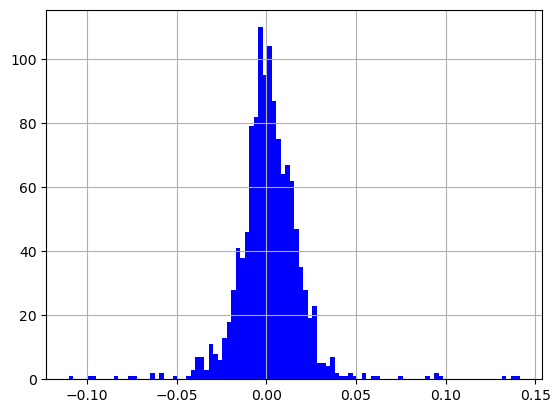

In [49]:
amazon_data['vol'].hist(bins=100,color='blue')

## Cumulative ( tich luy)

In [50]:
amazon_data['Cumulative Return']=(1+amazon_data['vol']).cumprod()

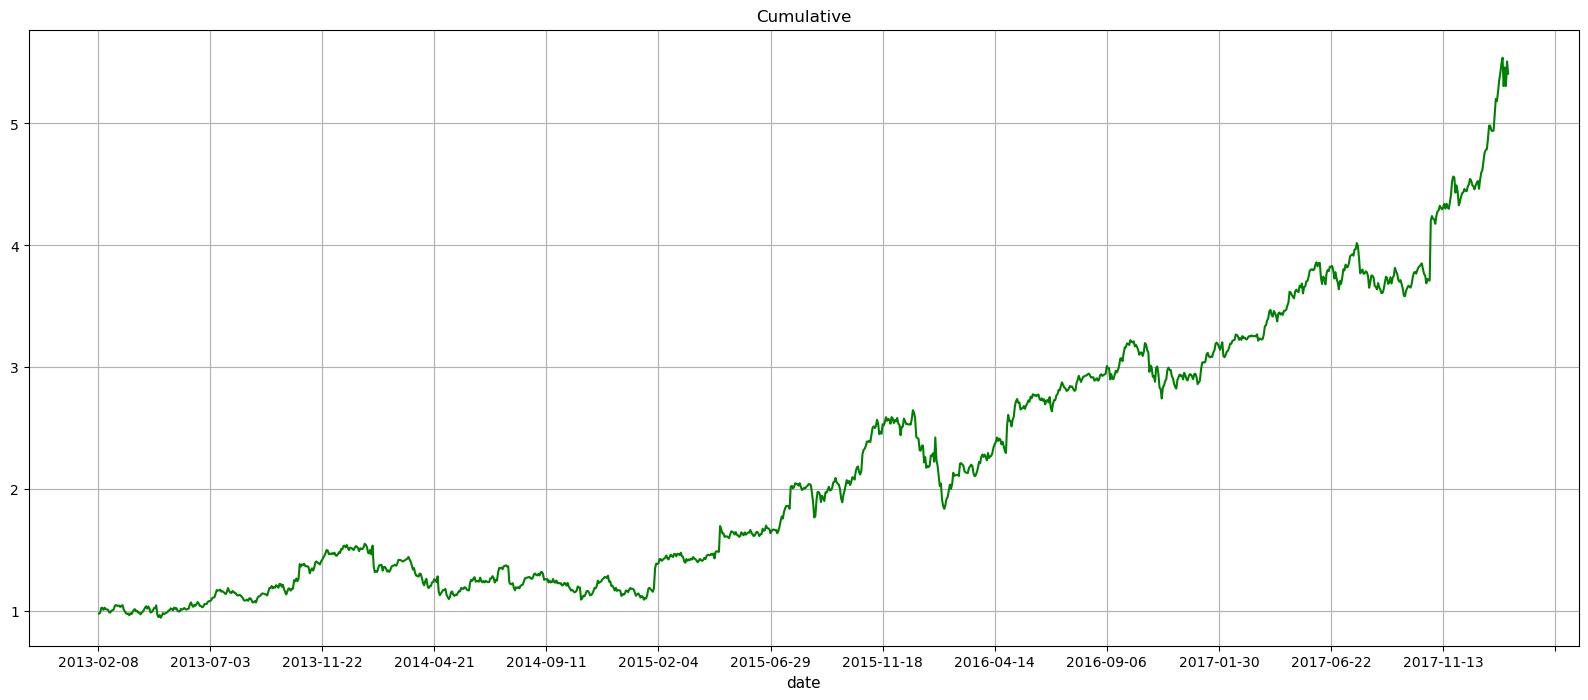

In [52]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(amazon_data['date'],amazon_data['Cumulative Return'],color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel("date",fontsize='11')
plt.title("Cumulative Return")
plt.title('Cumulative')
plt.grid()
plt.show()

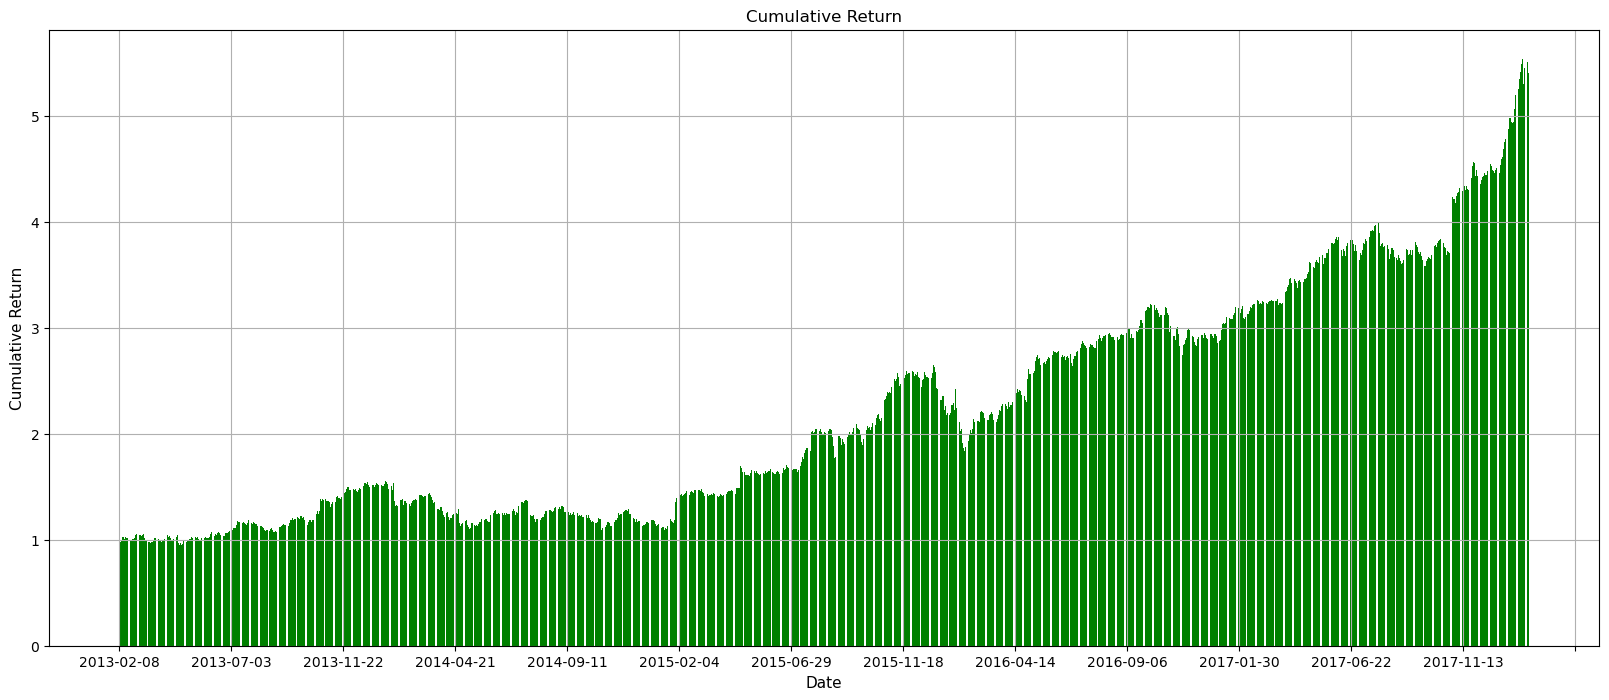

In [54]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['date'], amazon_data['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

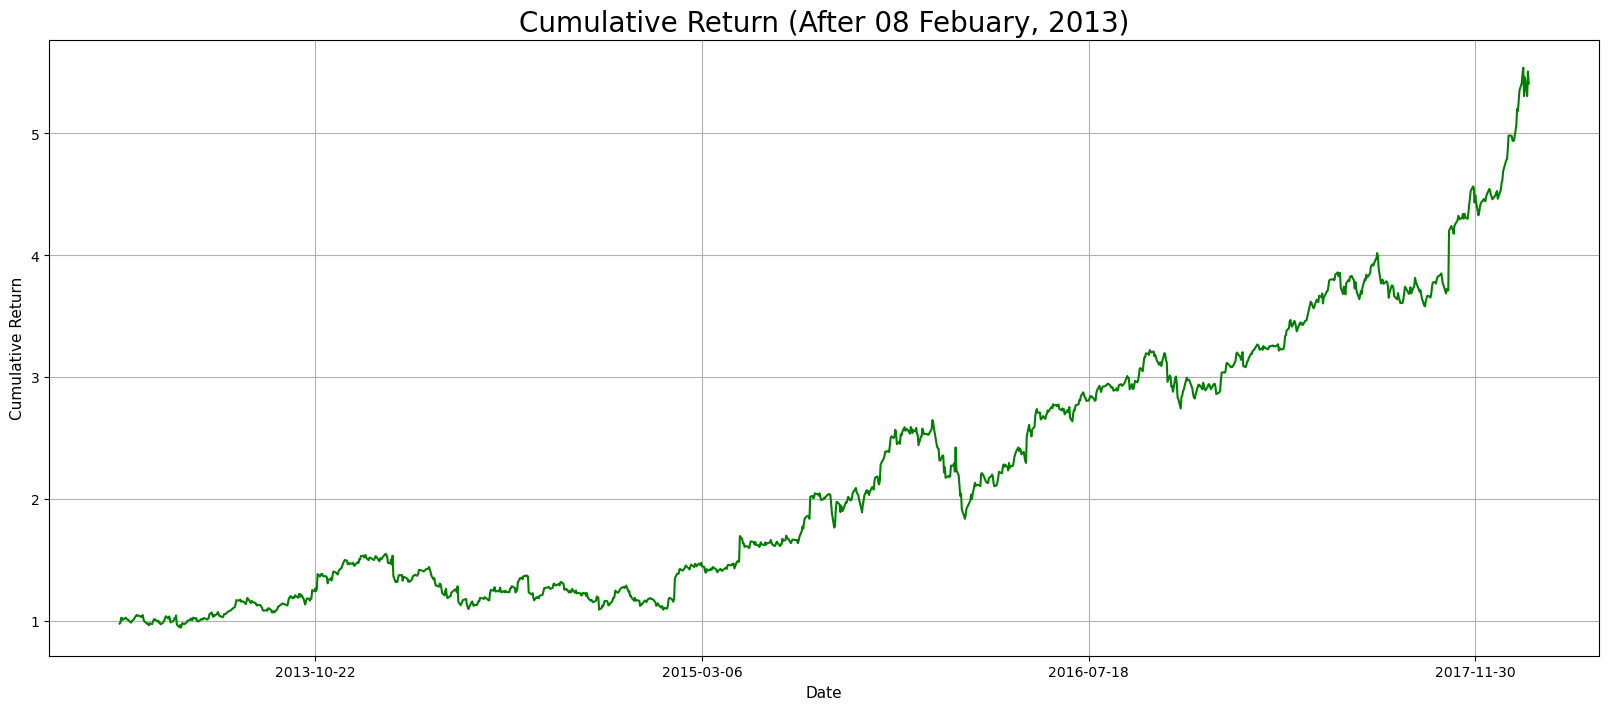

In [61]:
ohlc = amazon_data[(amazon_data['date'] > '2013-02-08')]
ohlc = ohlc.loc[:, ['date', 'open', 'high', 'low', 'close', 'volume', 'Market Cap', 'Cumulative Return']]
ohlc['date'] = pd.to_datetime(ohlc['date'])
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['date'], ohlc['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.grid()
plt.title('Cumulative Return (After 08 Febuary, 2013)', fontsize='20')
plt.show()

In [63]:
amazon_data.iloc[amazon_data['Cumulative Return'].argmax()]

date                   2018-01-31
open                       1451.3
high                      1472.58
low                       1450.04
close                     1450.89
volume                    6424693
Market Cap           9324156950.9
vol                       0.00909
Cumulative Return        5.538805
Name: 1253, dtype: object

## Buiding Model (Long_short-Term_Memory(LSTM))

In [64]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [66]:
amazon_data['date'] = pd.to_datetime(amazon_data['date'])
amazon_data.set_index('date',inplace=True)

## Preprocessing

In [67]:
data = amazon_data.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1008

## Scaler

In [68]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01140805],
       [0.00746678],
       [0.0087057 ],
       ...,
       [0.94937056],
       [0.9933065 ],
       [0.97163787]])

## Training Model

In [70]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01140805, 0.00746678, 0.0087057 , 0.01766085, 0.01746961,
       0.01401892, 0.01789367, 0.01511649, 0.01472569, 0.01429332,
       0.00967855, 0.00925449, 0.01248898, 0.0133371 , 0.01455939,
       0.02068748, 0.02274957, 0.02125289, 0.02132772, 0.02158549,
       0.01913259, 0.0215356 , 0.02234214, 0.01455939, 0.01129995,
       0.0080322 , 0.00680159, 0.00752332, 0.00429049, 0.00791579,
       0.00647731, 0.0100444 , 0.01419354, 0.01518301, 0.01112534,
       0.01254885, 0.00898009, 0.00902167, 0.0060283 , 0.00891357,
       0.01073454, 0.01375285, 0.01797682, 0.02048792, 0.01620574,
       0.02004723, 0.01593967, 0.00930438, 0.01005272, 0.01273843,
       0.0171869 , 0.01708712, 0.02200955, 0.00547121, 0.00125555,
       0.00463972, 0.        , 0.00359204, 0.00816523, 0.00622786])]
[0.007899156868940521]



In [71]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [72]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(948, 60, 1)

In [73]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [74]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
948/948 [==============================] - 41s 38ms/step - loss: 0.0010
Epoch 2/10
948/948 [==============================] - 39s 41ms/step - loss: 4.7756e-04
Epoch 3/10
948/948 [==============================] - 53s 56ms/step - loss: 3.2880e-04
Epoch 4/10
948/948 [==============================] - 53s 55ms/step - loss: 2.3127e-04
Epoch 5/10
948/948 [==============================] - 36s 38ms/step - loss: 2.5068e-04
Epoch 6/10
948/948 [==============================] - 39s 41ms/step - loss: 1.6385e-04
Epoch 7/10
948/948 [==============================] - 39s 41ms/step - loss: 1.5977e-04
Epoch 8/10
948/948 [==============================] - 37s 39ms/step - loss: 1.6163e-04
Epoch 9/10
948/948 [==============================] - 39s 41ms/step - loss: 1.7184e-04
Epoch 10/10
948/948 [==============================] - 37s 39ms/step - loss: 1.5425e-04


## Test Model

In [79]:
test_data= scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [80]:
x_test = np.array(x_test)

In [81]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(251, 60, 1)

In [82]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 2s 15ms/step


In [83]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

21.43940342147037

### Evaluation

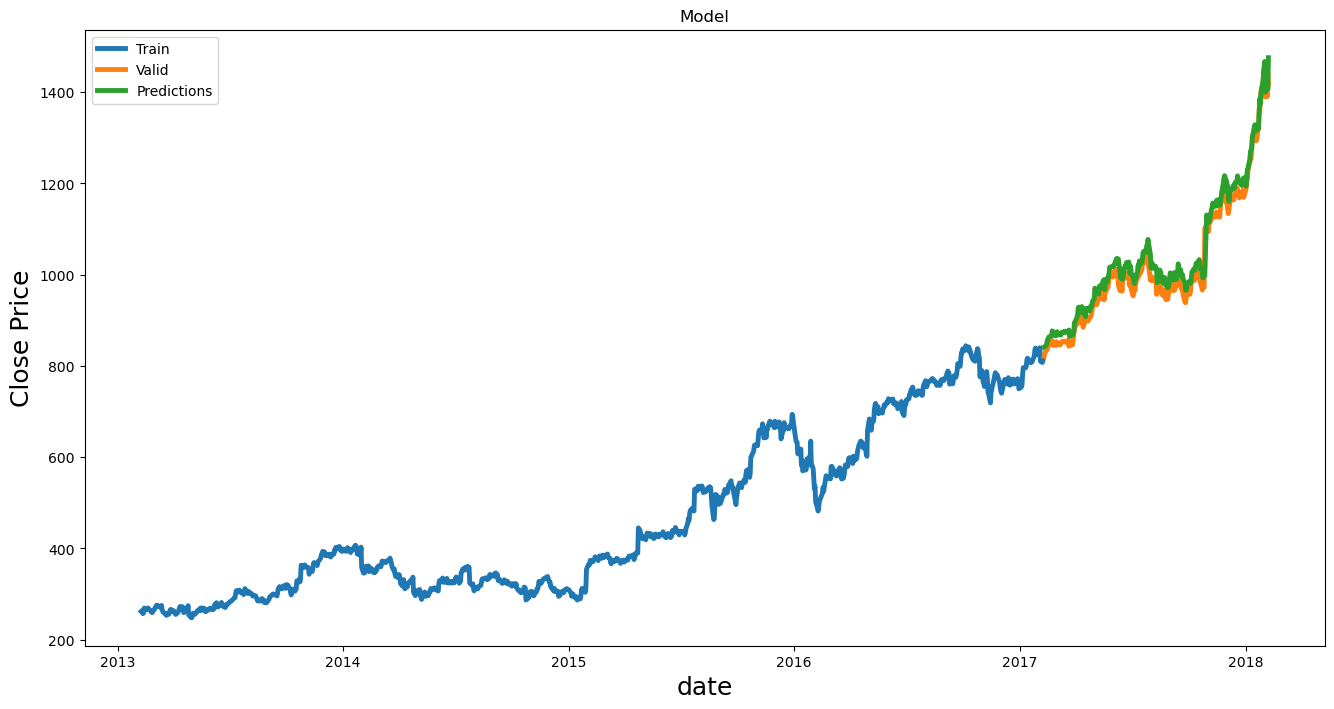

In [86]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['close'],linewidth=3.5)
plt.plot(valid[['close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper left')
plt.show()

In [89]:
valid.tail(5)

,close,Predictions
date,,
2018-02-01,1390.00,1467.359619
2018-02-02,1429.95,1399.987305
2018-02-05,1390.00,1461.452637
2018-02-06,1442.84,1406.315430
2018-02-07,1416.78,1475.584229


In [92]:
amazon_quote = pd.read_csv('D:\\IBM_Data_Science\\Data_set\\Data_Kagle_Github\\data_stock\\AMZN_data.csv')
new_amazon_data = amazon_quote.filter(['close'])
last_60_days = new_amazon_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price= model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 42ms/step


array([[1431.7692]], dtype=float32)